# Cleaning Data 

### Importing necessary libaries and loading dataset 

In [1]:
#import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
!ls ../

Data                      Notebooks                 Scalers
Model                     Picuters for presentation Tableau


In [3]:
#read the dataset
transport = pd.read_csv('../Data/raw/Raw_data.csv')

transport.head()

,COUNTRY,Country,VARIABLE,Variable,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,CAN,Canada,T-SEA-CAB,Coastal shipping (national transport),2000,2000,TONNEKM,Tonnes-kilometres,6,Millions,NaN,NaN,13891.0,NaN,NaN
1,CAN,Canada,T-SEA-CAB,Coastal shipping (national transport),2001,2001,TONNEKM,Tonnes-kilometres,6,Millions,NaN,NaN,15055.0,NaN,NaN
2,CAN,Canada,T-SEA-CAB,Coastal shipping (national transport),2002,2002,TONNEKM,Tonnes-kilometres,6,Millions,NaN,NaN,21451.0,NaN,NaN
3,CAN,Canada,T-SEA-CAB,Coastal shipping (national transport),2003,2003,TONNEKM,Tonnes-kilometres,6,Millions,NaN,NaN,25517.0,NaN,NaN
4,CAN,Canada,T-SEA-CAB,Coastal shipping (national transport),2004,2004,TONNEKM,Tonnes-kilometres,6,Millions,NaN,NaN,25329.0,NaN,NaN


### Checking the data information

In [4]:
transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3469 entries, 0 to 3468
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   COUNTRY                3469 non-null   object 
 1   Country                3469 non-null   object 
 2   VARIABLE               3469 non-null   object 
 3   Variable               3469 non-null   object 
 4   YEAR                   3469 non-null   int64  
 5   Year                   3469 non-null   int64  
 6   Unit Code              3469 non-null   object 
 7   Unit                   3469 non-null   object 
 8   PowerCode Code         3469 non-null   int64  
 9   PowerCode              3469 non-null   object 
 10  Reference Period Code  0 non-null      float64
 11  Reference Period       0 non-null      float64
 12  Value                  2862 non-null   float64
 13  Flag Codes             768 non-null    object 
 14  Flags                  768 non-null    object 
dtypes: f

In [5]:
transport.shape

(3469, 15)

### change the columns name & drop unnecessary columns 

In [6]:
#re-name the columns
transport.rename(columns={'COUNTRY':'country_id', 'VARIABLE':'variable_code','YEAR':'year1' }, inplace=True)
transport.rename(columns =lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3469 entries, 0 to 3468
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_id             3469 non-null   object 
 1   country                3469 non-null   object 
 2   variable_code          3469 non-null   object 
 3   variable               3469 non-null   object 
 4   year1                  3469 non-null   int64  
 5   year                   3469 non-null   int64  
 6   unit_code              3469 non-null   object 
 7   unit                   3469 non-null   object 
 8   powercode_code         3469 non-null   int64  
 9   powercode              3469 non-null   object 
 10  reference_period_code  0 non-null      float64
 11  reference_period       0 non-null      float64
 12  value                  2862 non-null   float64
 13  flag_codes             768 non-null    object 
 14  flags                  768 non-null    object 
dtypes: f

In [7]:
#check if two columns have the same values in a Pandas DataFrame:
(transport['year1']==transport['year']).all()


True

In [8]:
#two year columns have the same value, drop one of them
transport.drop(columns=['year1'], inplace=True)

In [9]:
# checking the number of missing value
transport.isna().sum()

country_id                  0
country                     0
variable_code               0
variable                    0
year                        0
unit_code                   0
unit                        0
powercode_code              0
powercode                   0
reference_period_code    3469
reference_period         3469
value                     607
flag_codes               2701
flags                    2701
dtype: int64

In [10]:
# drop the columns does not contain the value
transport.drop(columns=['reference_period'], inplace=True)
transport.drop(columns=['reference_period_code'], inplace=True)

In [11]:
# rearange the columns 

transport = transport [['country_id','country','variable_code','variable','year','unit_code','unit','powercode_code','powercode','flag_codes','flags','value']]

transport.head(5)

,country_id,country,variable_code,variable,year,unit_code,unit,powercode_code,powercode,flag_codes,flags,value
0,CAN,Canada,T-SEA-CAB,Coastal shipping (national transport),2000,TONNEKM,Tonnes-kilometres,6,Millions,NaN,NaN,13891.0
1,CAN,Canada,T-SEA-CAB,Coastal shipping (national transport),2001,TONNEKM,Tonnes-kilometres,6,Millions,NaN,NaN,15055.0
2,CAN,Canada,T-SEA-CAB,Coastal shipping (national transport),2002,TONNEKM,Tonnes-kilometres,6,Millions,NaN,NaN,21451.0
3,CAN,Canada,T-SEA-CAB,Coastal shipping (national transport),2003,TONNEKM,Tonnes-kilometres,6,Millions,NaN,NaN,25517.0
4,CAN,Canada,T-SEA-CAB,Coastal shipping (national transport),2004,TONNEKM,Tonnes-kilometres,6,Millions,NaN,NaN,25329.0


In [12]:
#check the column "value" for null values and replace those null values with '0'
transport['value'].value_counts(dropna=False)
transport['value'] = transport['value'].fillna(0.)

In [13]:
transport['flag_codes'].value_counts(dropna=False)


NaN    2701
M       606
B        92
E        61
P         9
Name: flag_codes, dtype: int64

In [14]:
transport['flags'].value_counts(dropna=False)

NaN                                 2701
Missing value; data cannot exist     606
Break                                 92
Estimated value                       61
Provisional value                      9
Name: flags, dtype: int64

In [15]:
transport = transport[transport['flags'].isna()==False]

In [16]:
# drop the columns have the same value
transport.drop(columns=['flag_codes'], axis=1, inplace=True)
transport.drop(columns=['country_id'], axis=1, inplace=True)
transport.drop(columns=['variable_code'],axis=1, inplace=True)
transport.drop(columns=['unit_code'], axis=1, inplace=True)
transport.drop(columns="powercode_code", axis=1, inplace=True)

In [17]:
transport['variable'].unique()

array(['Total inland freight transport',
       'Coastal shipping (national transport)',
       'Maritime containers transport (TEU)',
       'Rail containers transport (TEU)'], dtype=object)

In [18]:
#rename the value in rows 
transport['variable'].replace({'Total inland freight transport': 'Inland Freight',
                              'Coastal shipping (national transport)': 'Coastal Shipping',
                              'Maritime containers transport (TEU)': 'Maritime Containers (TEU)',
                              'Rail containers transport (TEU)': 'Rail Containers (TEU)'}, inplace=True)

transport['flags'].replace({'Missing value; data cannot exist':'Missing value'}, inplace=True)

In [19]:
transport.head()

,country,variable,year,unit,powercode,flags,value
18,Austria,Inland Freight,2006,Tonnes-kilometres,Millions,Break,49901.00
63,Sweden,Coastal Shipping,2011,Tonnes-kilometres,Millions,Break,7794.00
67,Sweden,Coastal Shipping,2015,Tonnes-kilometres,Millions,Break,7220.91
81,Denmark,Inland Freight,2007,Tonnes-kilometres,Millions,Break,18203.00
91,Poland,Inland Freight,2000,Tonnes-kilometres,Millions,Break,150998.00


## Data Exploration 

In [20]:
#checking the value in some specific columns 
transport.loc[:,["year","variable","value"]]

,year,variable,value
18,2006,Inland Freight,49901.00
63,2011,Coastal Shipping,7794.00
67,2015,Coastal Shipping,7220.91
81,2007,Inland Freight,18203.00
91,2000,Inland Freight,150998.00
...,...,...,...
3443,2017,Rail Containers (TEU),0.00
3444,2018,Rail Containers (TEU),0.00
3445,2019,Rail Containers (TEU),0.00
3446,2020,Rail Containers (TEU),0.00


In [21]:
#checking flas and value columns if they are related
flags_missing_value = transport[transport['flags']=='Missing value']
flags_missing_value

,country,variable,year,unit,powercode,flags,value
357,Moldova,Maritime Containers (TEU),2000,Number,Units,Missing value,0.0
358,Moldova,Maritime Containers (TEU),2001,Number,Units,Missing value,0.0
359,Moldova,Maritime Containers (TEU),2002,Number,Units,Missing value,0.0
360,Moldova,Maritime Containers (TEU),2003,Number,Units,Missing value,0.0
361,Moldova,Maritime Containers (TEU),2004,Number,Units,Missing value,0.0
...,...,...,...,...,...,...,...
3443,Albania,Rail Containers (TEU),2017,Number,Units,Missing value,0.0
3444,Albania,Rail Containers (TEU),2018,Number,Units,Missing value,0.0
3445,Albania,Rail Containers (TEU),2019,Number,Units,Missing value,0.0
3446,Albania,Rail Containers (TEU),2020,Number,Units,Missing value,0.0


In [22]:
value_zero = transport[transport['value']==0]
value_zero

,country,variable,year,unit,powercode,flags,value
357,Moldova,Maritime Containers (TEU),2000,Number,Units,Missing value,0.0
358,Moldova,Maritime Containers (TEU),2001,Number,Units,Missing value,0.0
359,Moldova,Maritime Containers (TEU),2002,Number,Units,Missing value,0.0
360,Moldova,Maritime Containers (TEU),2003,Number,Units,Missing value,0.0
361,Moldova,Maritime Containers (TEU),2004,Number,Units,Missing value,0.0
...,...,...,...,...,...,...,...
3443,Albania,Rail Containers (TEU),2017,Number,Units,Missing value,0.0
3444,Albania,Rail Containers (TEU),2018,Number,Units,Missing value,0.0
3445,Albania,Rail Containers (TEU),2019,Number,Units,Missing value,0.0
3446,Albania,Rail Containers (TEU),2020,Number,Units,Missing value,0.0


In [23]:
#checking the country contain a missing value (0 is value column)
transport[transport['flags']=='Missing value']["country"].unique()

array(['Moldova', 'Austria', 'Liechtenstein', 'Belarus', 'Switzerland',
       'Malta', 'Armenia', 'North Macedonia', 'Slovak Republic',
       'Hungary', 'Serbia, Republic of', 'Luxembourg', 'Iceland',
       'Czech Republic', 'Albania'], dtype=object)

In [24]:
transport[transport['country']=='United States']

,country,variable,year,unit,powercode,flags,value
2500,United States,Inland Freight,2012,Tonnes-kilometres,Millions,Break,6392694.6
2502,United States,Inland Freight,2014,Tonnes-kilometres,Millions,Break,6813036.4
2505,United States,Inland Freight,2017,Tonnes-kilometres,Millions,Estimated value,6659498.0
2506,United States,Inland Freight,2018,Tonnes-kilometres,Millions,Break,0.0


In [25]:
#drop the row 
transport = transport[~((transport['flags']== 'Break') & (transport['value']==0))]
transport[transport['country']=='United States']

,country,variable,year,unit,powercode,flags,value
2500,United States,Inland Freight,2012,Tonnes-kilometres,Millions,Break,6392694.6
2502,United States,Inland Freight,2014,Tonnes-kilometres,Millions,Break,6813036.4
2505,United States,Inland Freight,2017,Tonnes-kilometres,Millions,Estimated value,6659498.0


In [26]:
transport[transport['value']==0]["country"].unique()

array(['Moldova', 'Austria', 'Liechtenstein', 'Belarus', 'Switzerland',
       'Malta', 'Armenia', 'North Macedonia', 'Slovak Republic',
       'Hungary', 'Serbia, Republic of', 'Luxembourg', 'Iceland',
       'Czech Republic', 'Albania'], dtype=object)

In [27]:
transport["country"].unique()

array(['Austria', 'Sweden', 'Denmark', 'Poland', 'Armenia', 'Moldova',
       'Liechtenstein', 'Ukraine', 'Luxembourg', 'Switzerland',
       'New Zealand', 'Belarus', 'Spain', 'France', 'Germany',
       'Slovak Republic', 'Malta', 'Albania', 'Hungary', 'Belgium',
       'Russian Federation', 'Italy', 'India', 'Portugal',
       'North Macedonia', 'Norway', 'Australia', 'Azerbaijan', 'Greece',
       'Bulgaria', 'Czech Republic', 'Ireland', 'Latvia', 'Japan',
       'Canada', 'China', 'Serbia, Republic of', 'Türkiye', 'Croatia',
       'United Kingdom', 'Iceland', 'United States',
       'Montenegro, Republic of', 'Estonia', 'Mexico', 'Romania', 'Chile'],
      dtype=object)

In [28]:
# checking Coastal_shipping 
Coastal_Shipping = transport[transport['variable'].str.contains("Coastal Shipping")]
Coastal_Shipping

,country,variable,year,unit,powercode,flags,value
63,Sweden,Coastal Shipping,2011,Tonnes-kilometres,Millions,Break,7794.000000
67,Sweden,Coastal Shipping,2015,Tonnes-kilometres,Millions,Break,7220.910000
379,Austria,Coastal Shipping,2000,Tonnes-kilometres,Millions,Missing value,0.000000
380,Austria,Coastal Shipping,2001,Tonnes-kilometres,Millions,Missing value,0.000000
381,Austria,Coastal Shipping,2002,Tonnes-kilometres,Millions,Missing value,0.000000
...,...,...,...,...,...,...,...
3366,Czech Republic,Coastal Shipping,2021,Tonnes-kilometres,Millions,Missing value,0.000000
3421,Chile,Coastal Shipping,2017,Tonnes-kilometres,Millions,Estimated value,10005.000000
3422,Chile,Coastal Shipping,2018,Tonnes-kilometres,Millions,Estimated value,13658.000000
3423,Chile,Coastal Shipping,2019,Tonnes-kilometres,Millions,Estimated value,12442.000000


In [29]:
#checking Inland Freight Shipping
Inland_Freight = transport[transport['variable'].str.contains('Inland Freight')]
Inland_Freight

,country,variable,year,unit,powercode,flags,value
18,Austria,Inland Freight,2006,Tonnes-kilometres,Millions,Break,49901.0
81,Denmark,Inland Freight,2007,Tonnes-kilometres,Millions,Break,18203.0
91,Poland,Inland Freight,2000,Tonnes-kilometres,Millions,Break,150998.0
95,Poland,Inland Freight,2004,Tonnes-kilometres,Millions,Break,188490.0
105,Poland,Inland Freight,2014,Tonnes-kilometres,Millions,Break,334255.0
...,...,...,...,...,...,...,...
3210,Greece,Inland Freight,2009,Tonnes-kilometres,Millions,Estimated value,17477.0
3211,Greece,Inland Freight,2010,Tonnes-kilometres,Millions,Estimated value,20747.0
3228,Mexico,Inland Freight,2005,Tonnes-kilometres,Millions,Break,258271.0
3329,Romania,Inland Freight,2004,Tonnes-kilometres,Millions,Break,64500.0


In [30]:
# checking Maritime containers
Maritime_Containers= transport[transport['variable'].str.contains('Maritime Containers \(TEU\)')]
Maritime_Containers

,country,variable,year,unit,powercode,flags,value
357,Moldova,Maritime Containers (TEU),2000,Number,Units,Missing value,0.0
358,Moldova,Maritime Containers (TEU),2001,Number,Units,Missing value,0.0
359,Moldova,Maritime Containers (TEU),2002,Number,Units,Missing value,0.0
360,Moldova,Maritime Containers (TEU),2003,Number,Units,Missing value,0.0
361,Moldova,Maritime Containers (TEU),2004,Number,Units,Missing value,0.0
...,...,...,...,...,...,...,...
2928,Slovak Republic,Maritime Containers (TEU),2018,Number,Units,Missing value,0.0
2929,Slovak Republic,Maritime Containers (TEU),2019,Number,Units,Missing value,0.0
2930,Slovak Republic,Maritime Containers (TEU),2020,Number,Units,Missing value,0.0
2931,Slovak Republic,Maritime Containers (TEU),2021,Number,Units,Missing value,0.0


In [31]:
#checking Rail_Containers
Rail_Containers = transport[transport['variable'].str.contains('Rail Containers \(TEU\)')]
Rail_Containers

,country,variable,year,unit,powercode,flags,value
486,Luxembourg,Rail Containers (TEU),2007,Number,Units,Break,29945.0
489,Luxembourg,Rail Containers (TEU),2010,Number,Units,Break,21000.0
500,Luxembourg,Rail Containers (TEU),2021,Number,Units,Break,176546.0
731,Malta,Rail Containers (TEU),2000,Number,Units,Missing value,0.0
732,Malta,Rail Containers (TEU),2001,Number,Units,Missing value,0.0
...,...,...,...,...,...,...,...
3443,Albania,Rail Containers (TEU),2017,Number,Units,Missing value,0.0
3444,Albania,Rail Containers (TEU),2018,Number,Units,Missing value,0.0
3445,Albania,Rail Containers (TEU),2019,Number,Units,Missing value,0.0
3446,Albania,Rail Containers (TEU),2020,Number,Units,Missing value,0.0


In [32]:

transport = transport[transport['value']!= 0.00]
transport.head(50)

,country,variable,year,unit,powercode,flags,value
18,Austria,Inland Freight,2006,Tonnes-kilometres,Millions,Break,4.990100e+04
63,Sweden,Coastal Shipping,2011,Tonnes-kilometres,Millions,Break,7.794000e+03
67,Sweden,Coastal Shipping,2015,Tonnes-kilometres,Millions,Break,7.220910e+03
81,Denmark,Inland Freight,2007,Tonnes-kilometres,Millions,Break,1.820300e+04
91,Poland,Inland Freight,2000,Tonnes-kilometres,Millions,Break,1.509980e+05
95,Poland,Inland Freight,2004,Tonnes-kilometres,Millions,Break,1.884900e+05
105,Poland,Inland Freight,2014,Tonnes-kilometres,Millions,Break,3.342550e+05
282,Armenia,Inland Freight,2007,Tonnes-kilometres,Millions,Estimated value,3.439000e+03
283,Armenia,Inland Freight,2008,Tonnes-kilometres,Millions,Estimated value,3.697000e+03
284,Armenia,Inland Freight,2009,Tonnes-kilometres,Millions,Estimated value,2.588000e+03


------------
##  store clean data in a csv file

In [33]:
file_path = '../Data/clean/transport.csv'
transport.to_csv(file_path, index=False)

In [34]:
import os
directory = os.path.dirname('../Data/clean/transport.csv')
if not os.path.exists(directory):
    
    os.makedirs(directory)

transport.to_csv('../Data/clean/transport.csv', index=False)



In [35]:
transport = pd.read_csv('../Data/clean/transport.csv')
transport


,country,variable,year,unit,powercode,flags,value
0,Austria,Inland Freight,2006,Tonnes-kilometres,Millions,Break,49901.000000
1,Sweden,Coastal Shipping,2011,Tonnes-kilometres,Millions,Break,7794.000000
2,Sweden,Coastal Shipping,2015,Tonnes-kilometres,Millions,Break,7220.910000
3,Denmark,Inland Freight,2007,Tonnes-kilometres,Millions,Break,18203.000000
4,Poland,Inland Freight,2000,Tonnes-kilometres,Millions,Break,150998.000000
...,...,...,...,...,...,...,...
156,Chile,Coastal Shipping,2017,Tonnes-kilometres,Millions,Estimated value,10005.000000
157,Chile,Coastal Shipping,2018,Tonnes-kilometres,Millions,Estimated value,13658.000000
158,Chile,Coastal Shipping,2019,Tonnes-kilometres,Millions,Estimated value,12442.000000
159,Chile,Coastal Shipping,2020,Tonnes-kilometres,Millions,Estimated value,9009.877284


### Draw charts

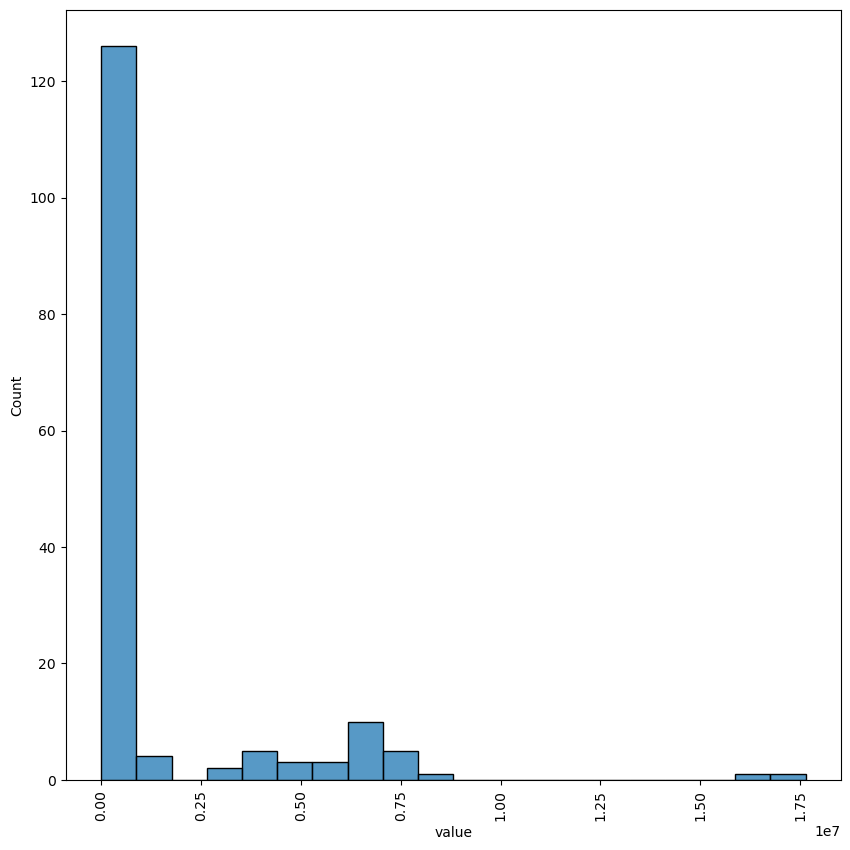

In [60]:
# sns.displot(transport['value'], bins=10)
# plt.show()
fig,ax = plt.subplots(figsize=(10,10))
sns.histplot(transport['value'], bins=20, ax=ax)
plt.xticks(rotation=90)
plt.show()

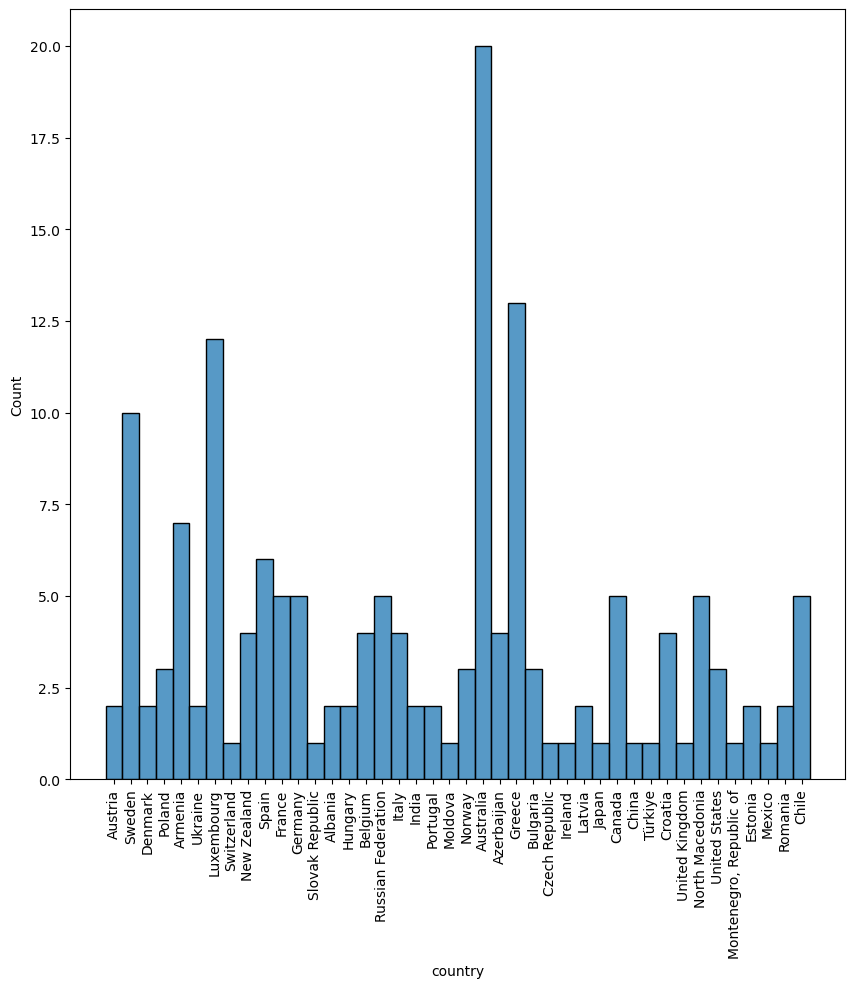

In [37]:
fig,ax = plt.subplots(figsize=(10,10))
sns.histplot(transport['country'], bins=10, ax=ax)
plt.xticks(rotation=90)
plt.show()

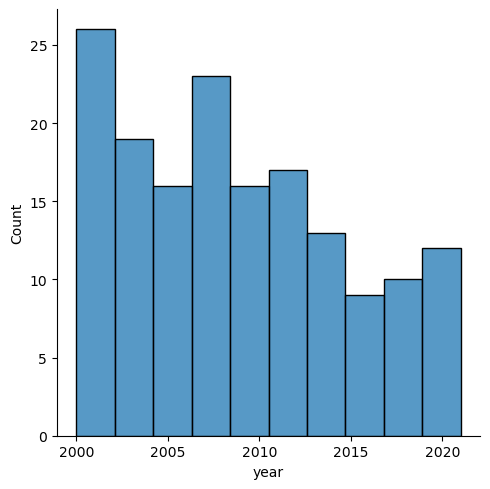

In [38]:

sns.displot(transport['year'], bins=10)
plt.show()

In [39]:
# value changes over years
# year -> x-axis    
# value -> y-axis
# sns.lineplot()

In [40]:
transport['country'].nunique()

42

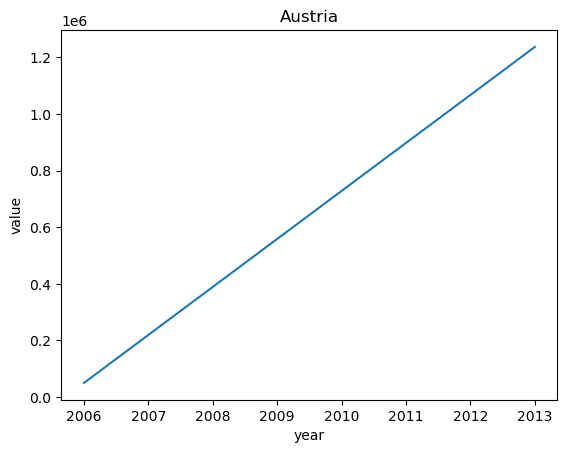

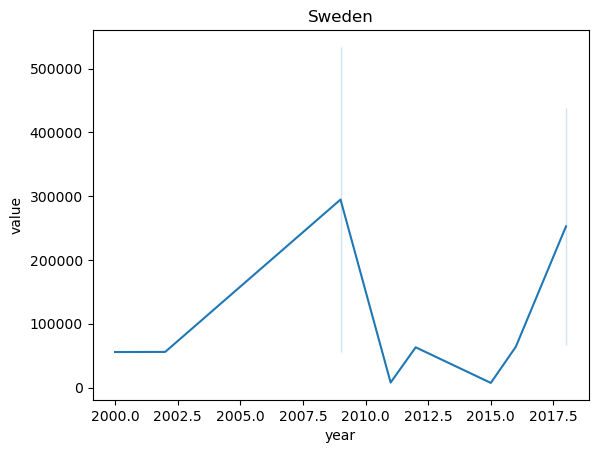

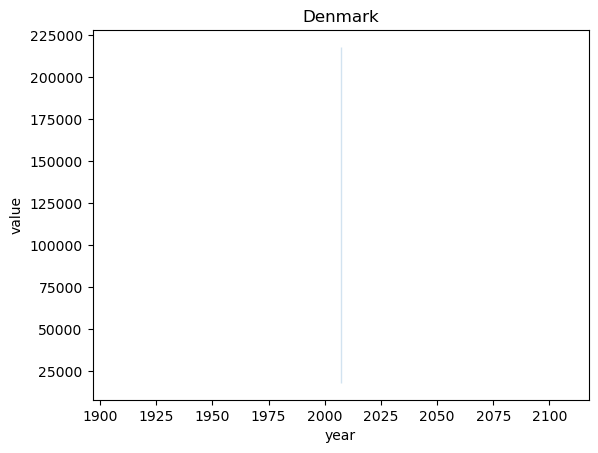

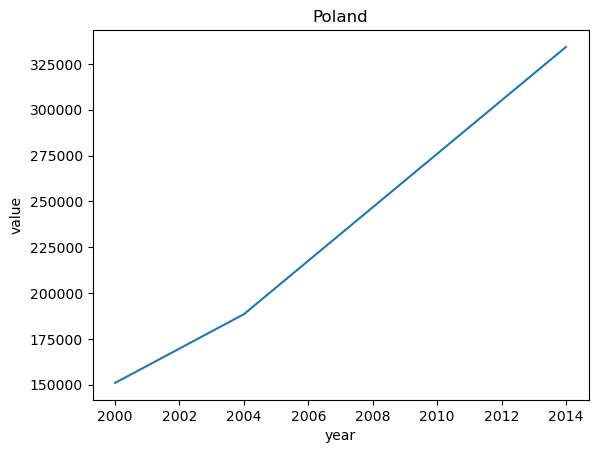

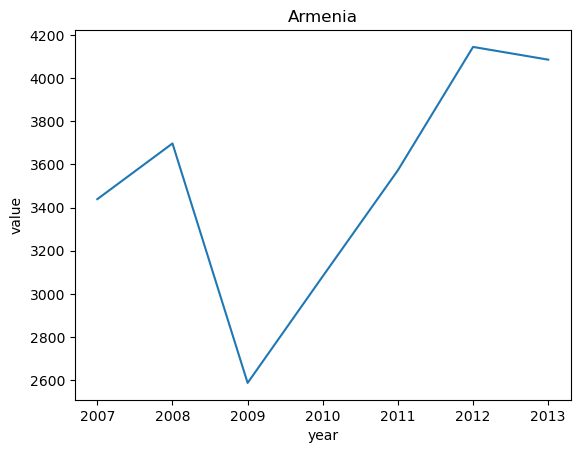

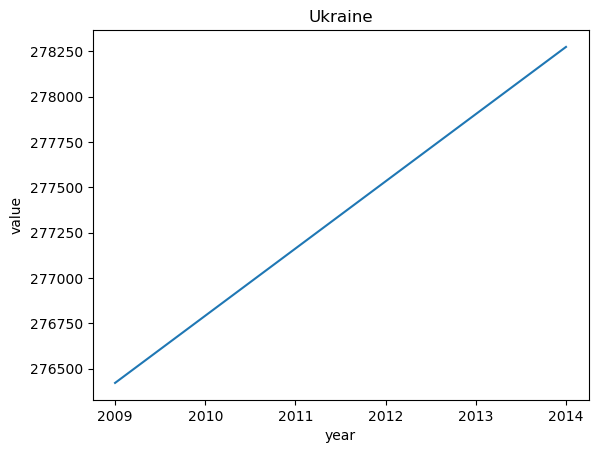

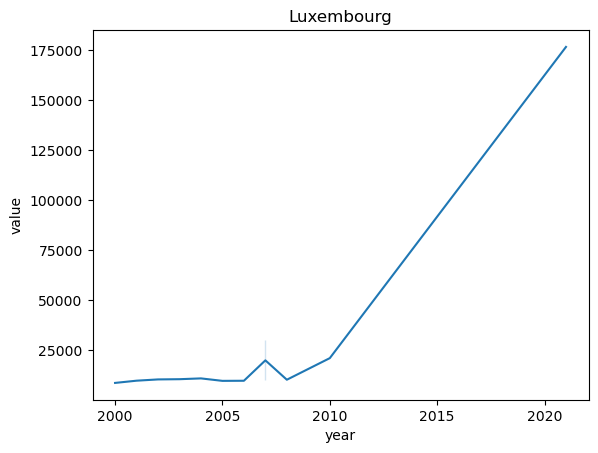

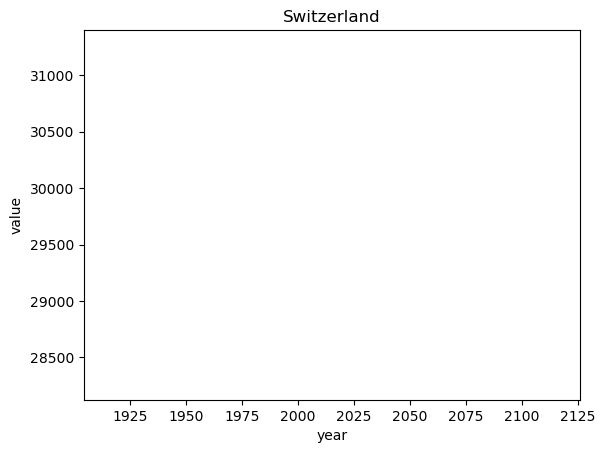

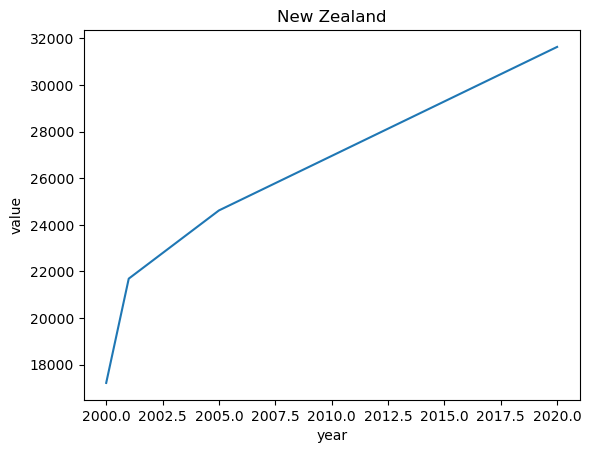

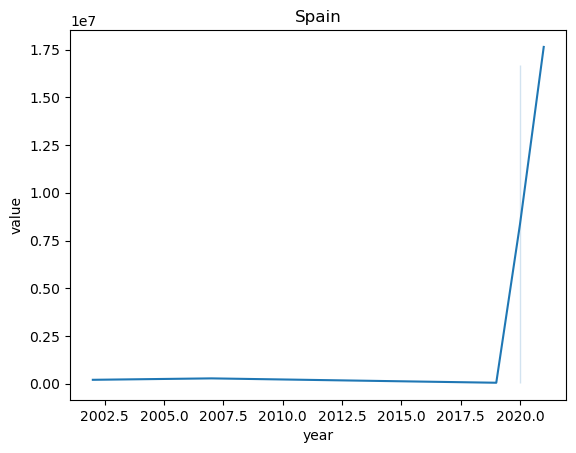

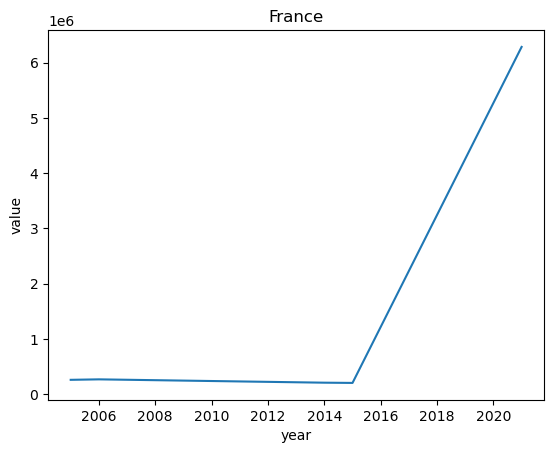

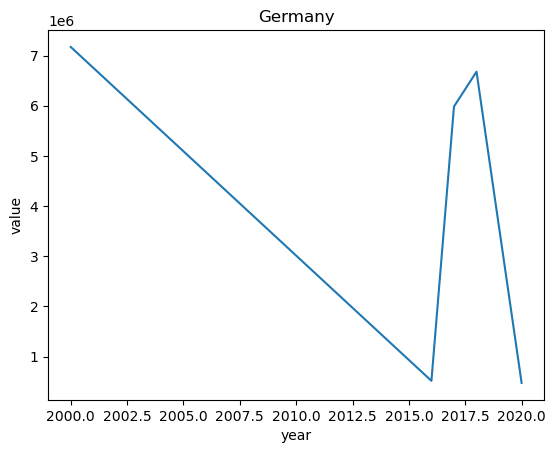

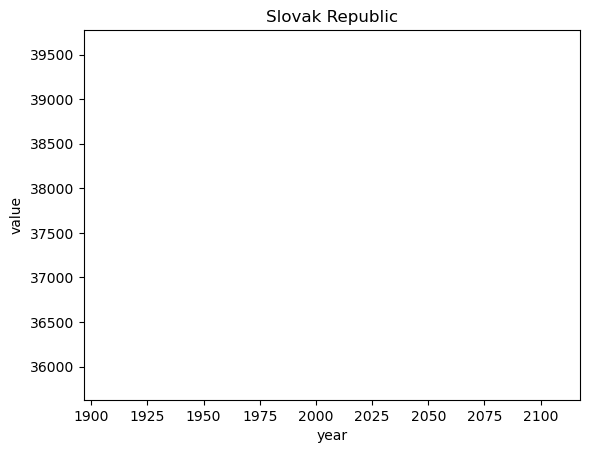

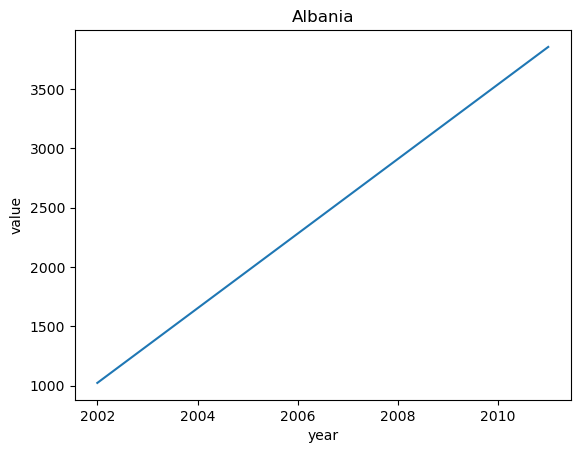

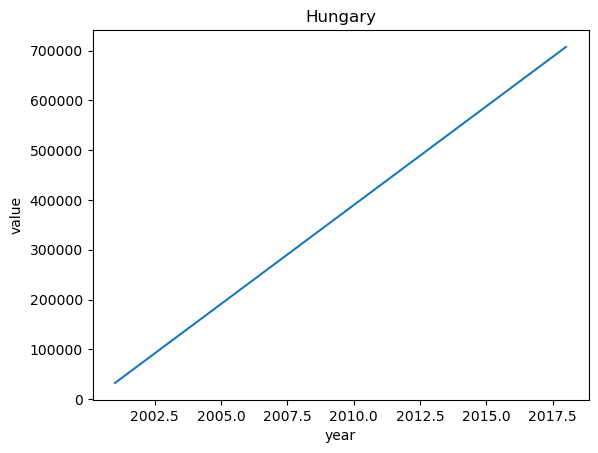

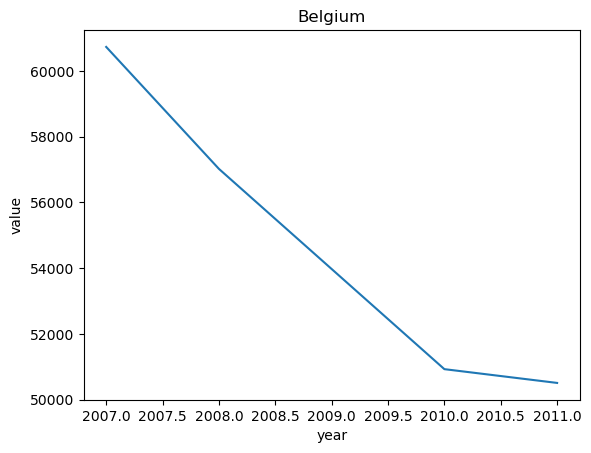

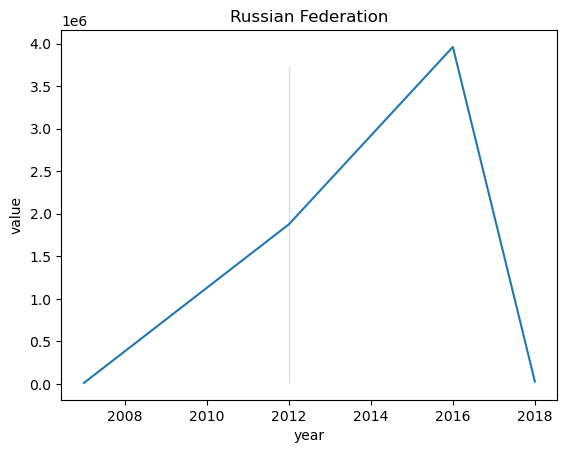

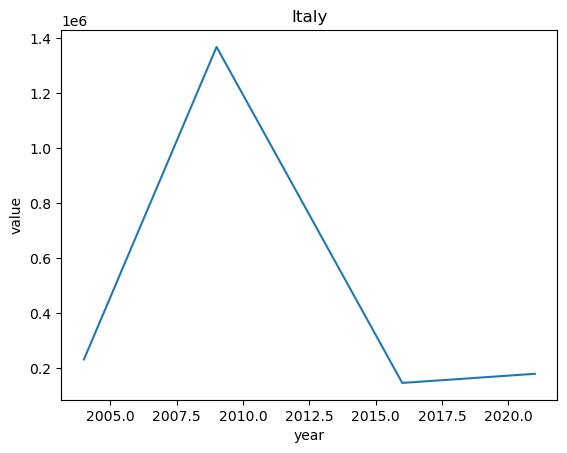

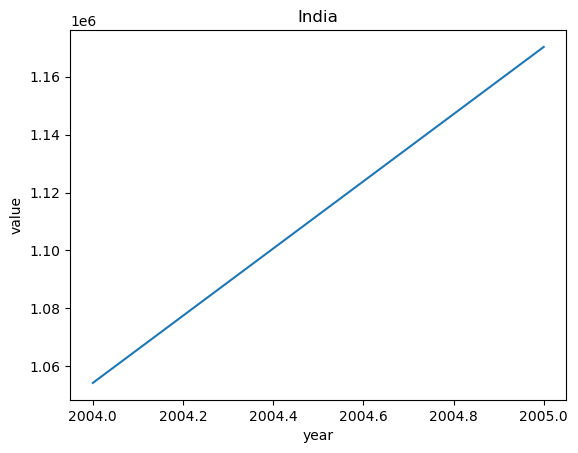

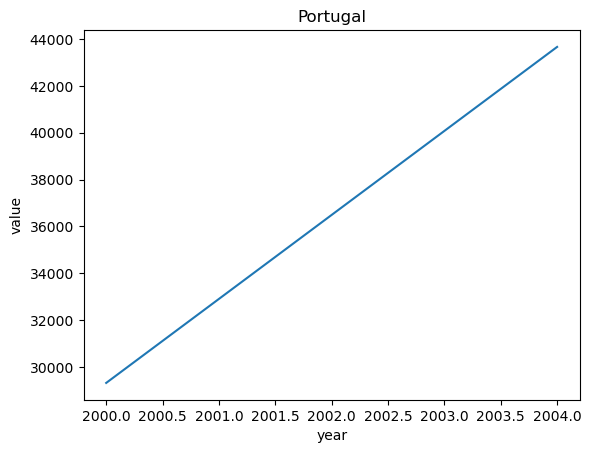

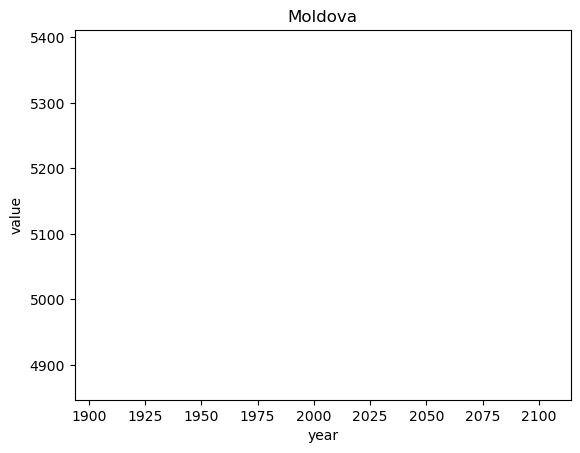

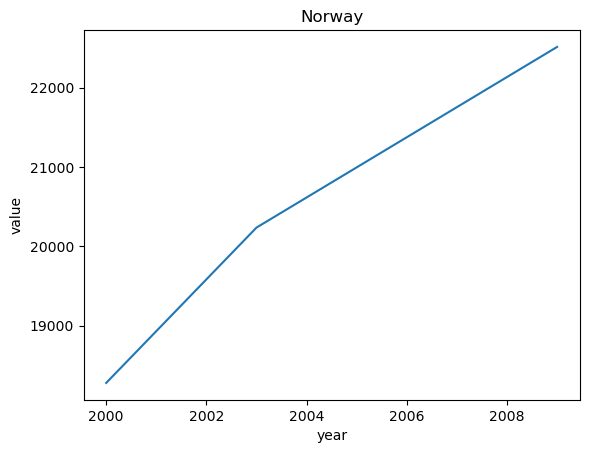

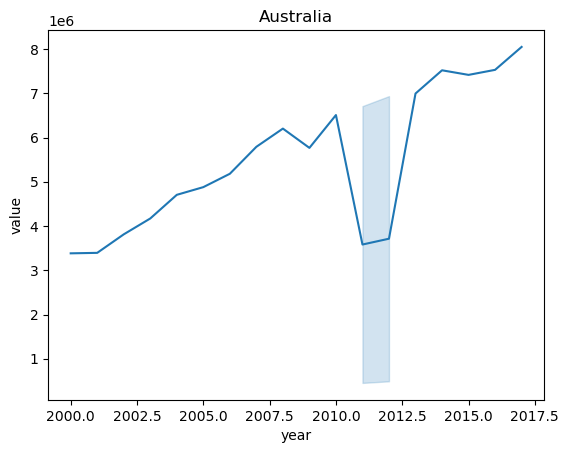

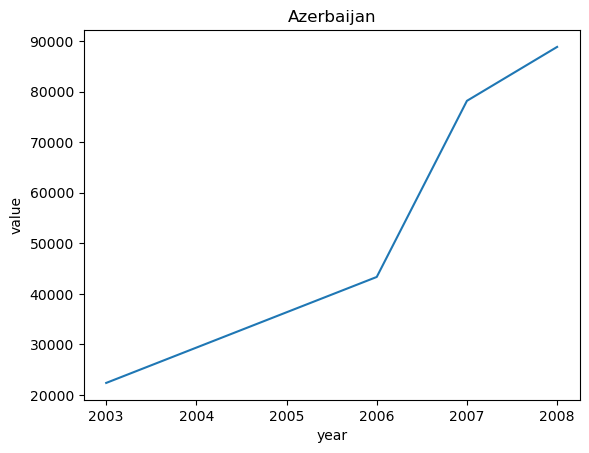

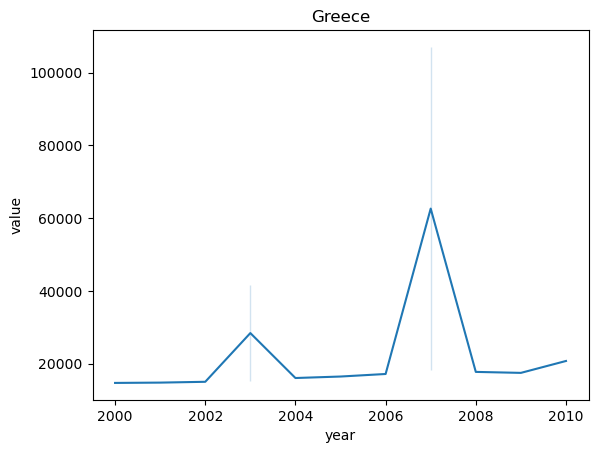

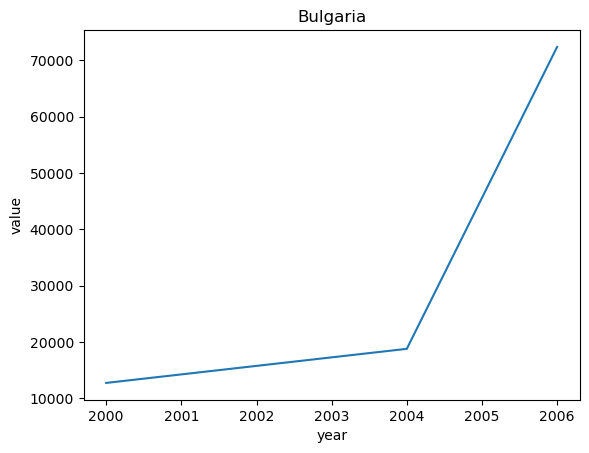

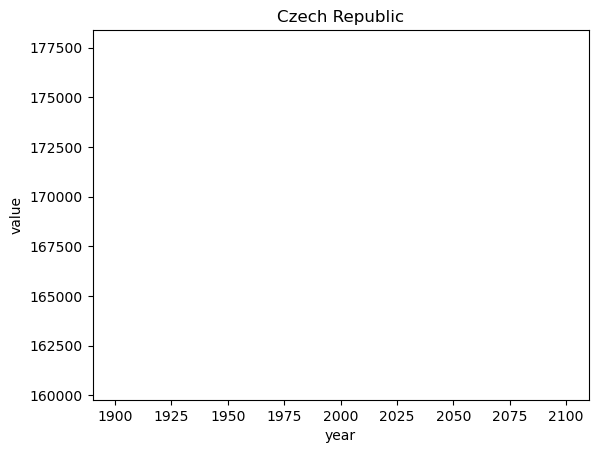

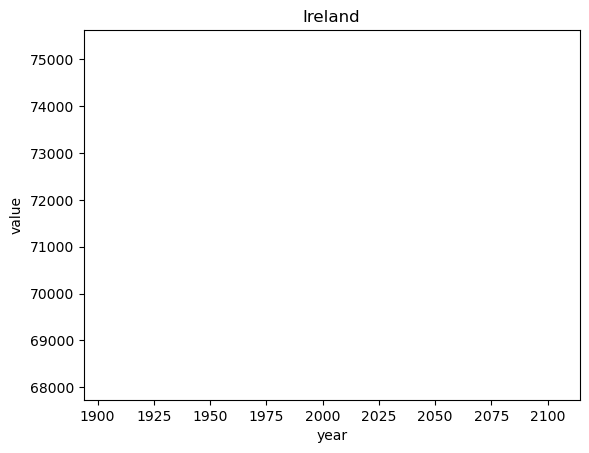

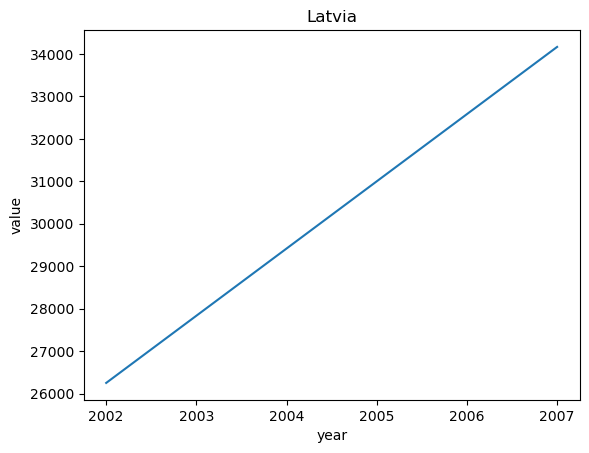

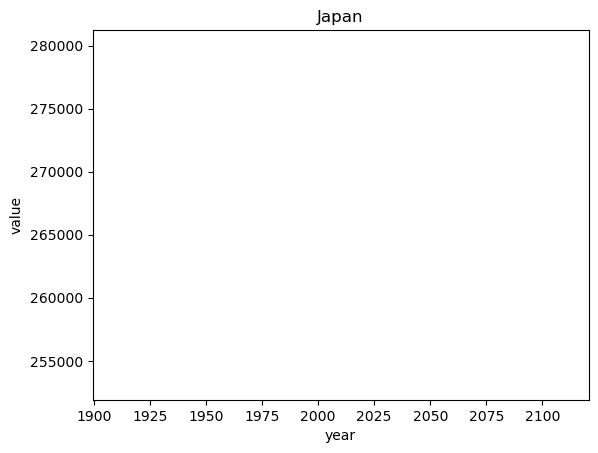

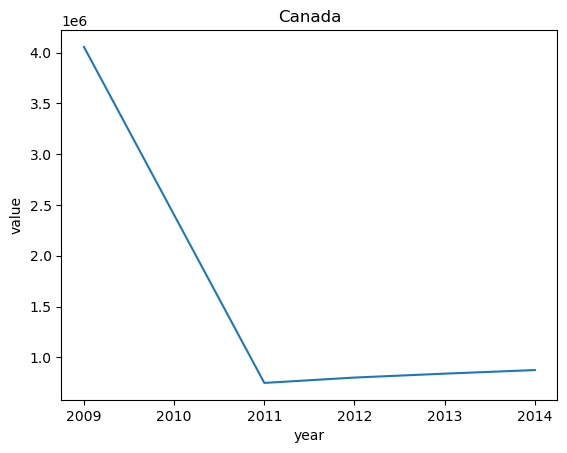

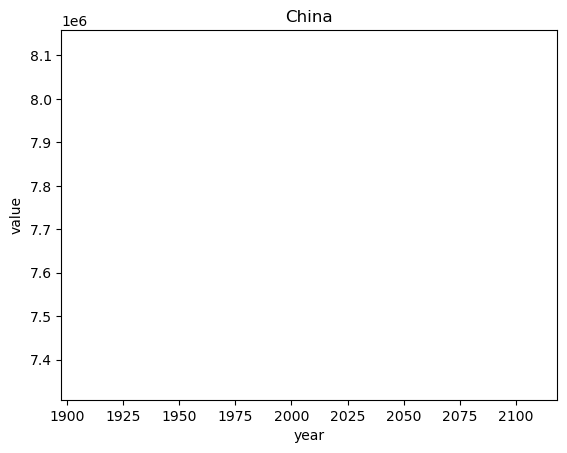

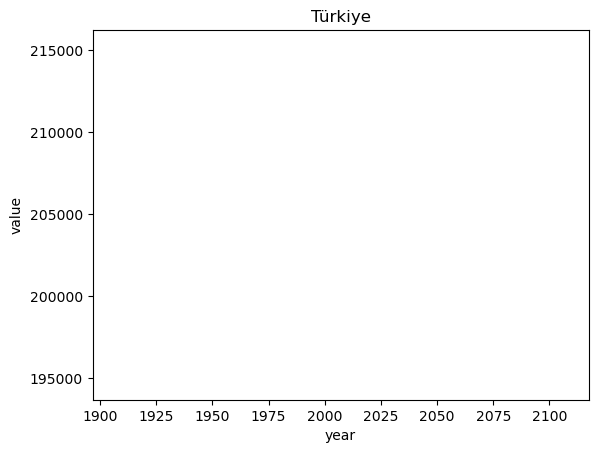

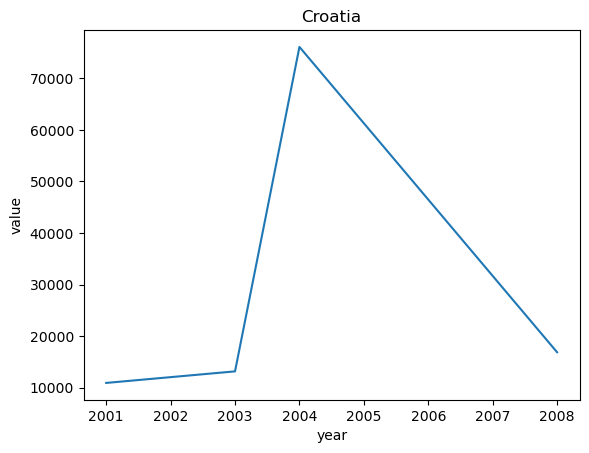

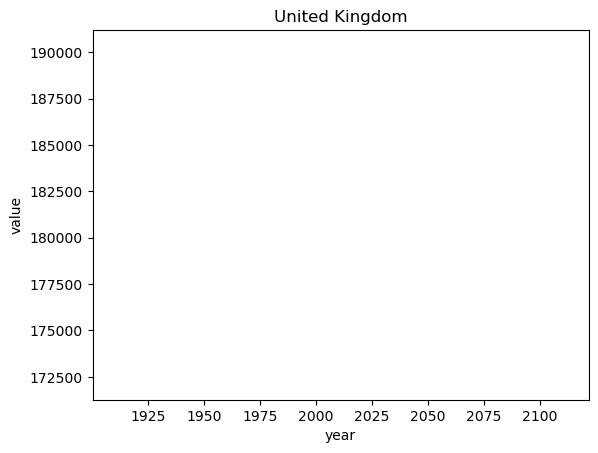

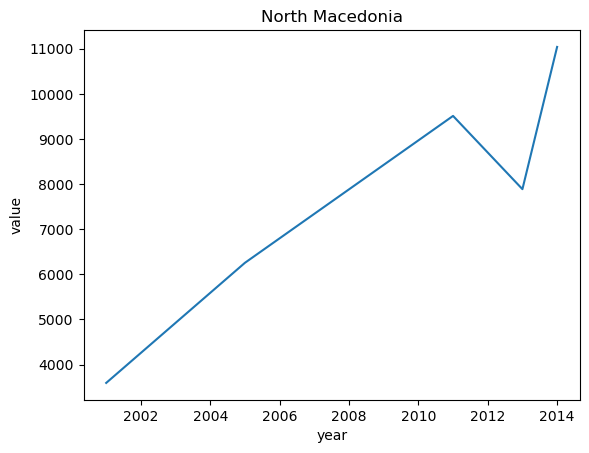

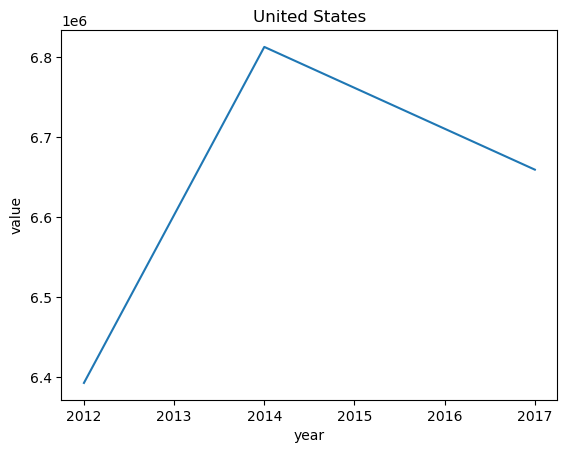

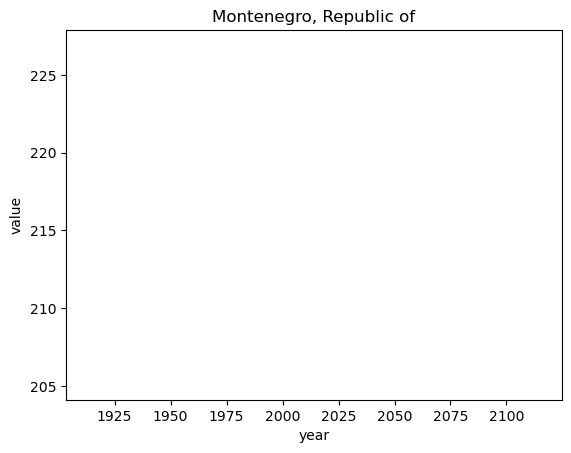

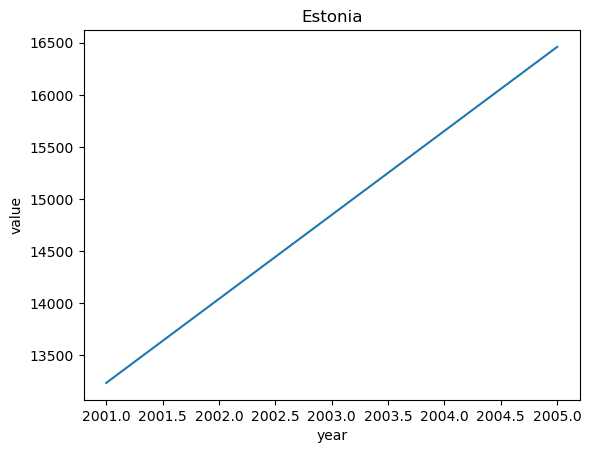

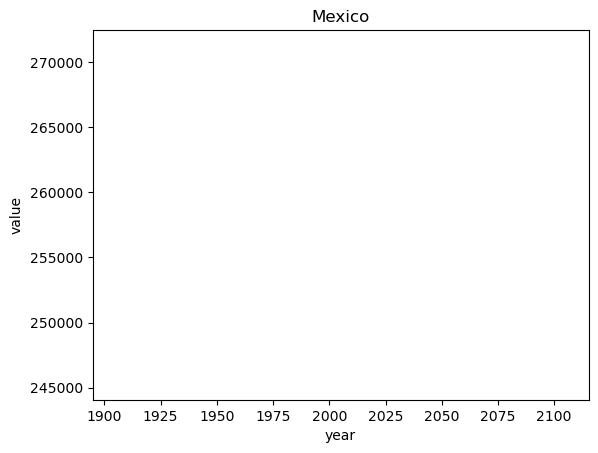

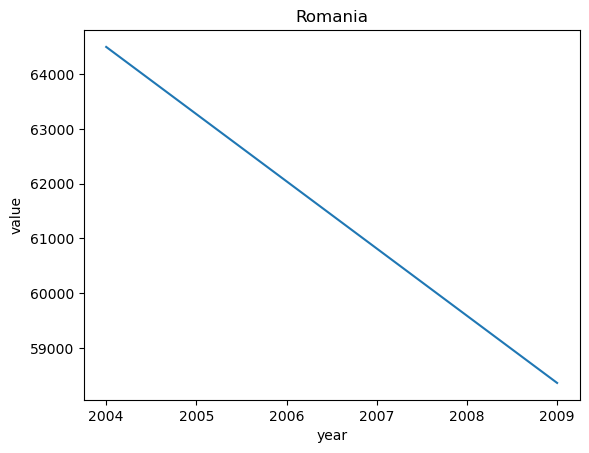

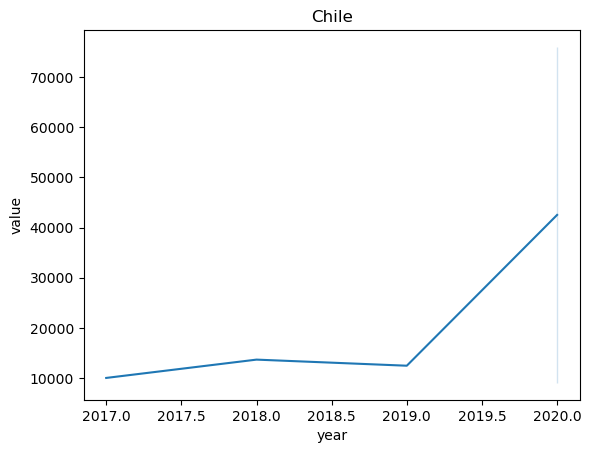

In [41]:
countries = transport['country'].unique()
for country in countries:
    data = transport[transport['country']==country]
    
    plt.figure()
    sns.lineplot(data=data, x='year', y='value')
    plt.title(country)
    plt.xlabel('year')
    plt.ylabel('value')
    plt.show()

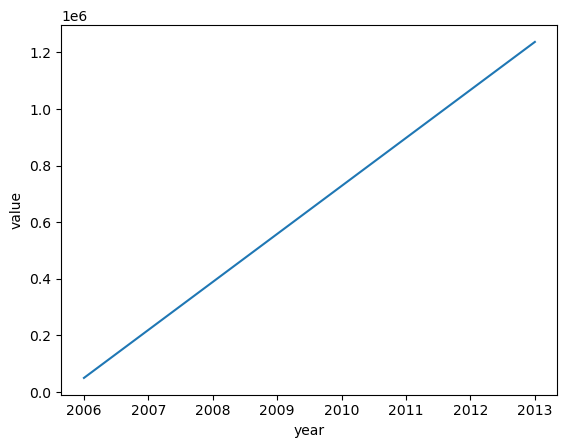

In [42]:
sns.lineplot(data=transport[transport['country']=="Austria"], x="year", y="value",)
plt.show()

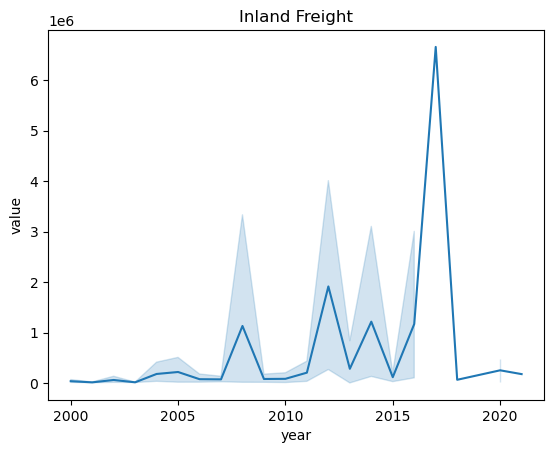

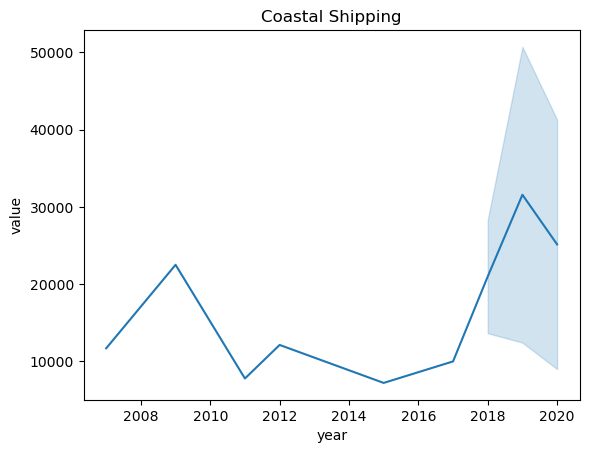

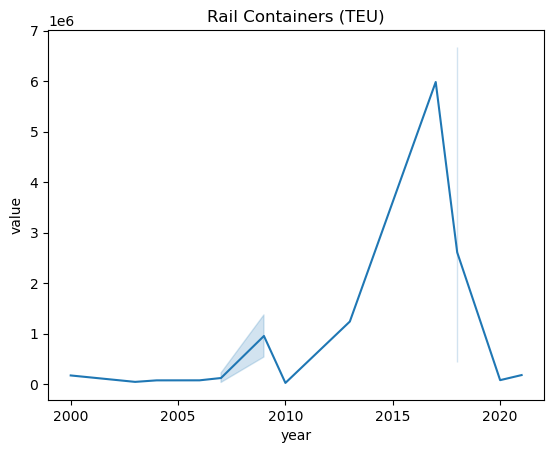

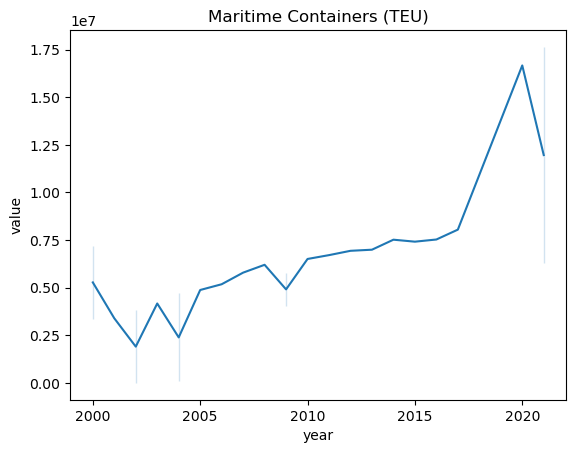

In [43]:
transport_type = transport['variable'].unique()

for variable in transport_type:
    
    subset = transport[transport['variable']==variable ]
    
    plt.figure()
    sns.lineplot(data=subset, x='year', y='value')
    plt.title(variable)
    plt.xlabel('year')
    plt.ylabel('value')

    plt.show()

 ### indentify the country has highest and lowest value in the dataset

In [44]:
country_value_max = transport.groupby('country')['value'].max()
country_value_min = transport.groupby('country')['value'].min()

print(f'Maximun value by country: {country_value_max}')
print (f'Minimun vallue by country: {country_value_min}"')

Maximun value by country: country
Albania                    3.855000e+03
Armenia                    4.144000e+03
Australia                  8.047764e+06
Austria                    1.237076e+06
Azerbaijan                 8.885060e+04
Belgium                    6.073300e+04
Bulgaria                   7.239000e+04
Canada                     4.056300e+06
Chile                      7.603000e+04
China                      7.733020e+06
Croatia                    7.610500e+04
Czech Republic             1.690780e+05
Denmark                    2.180470e+05
Estonia                    1.646000e+04
France                     6.283819e+06
Germany                    7.172675e+06
Greece                     1.070380e+05
Hungary                    7.075240e+05
India                      1.170243e+06
Ireland                    7.167800e+04
Italy                      1.368849e+06
Japan                      2.665730e+05
Latvia                     3.416600e+04
Luxembourg                 1.765460e+05
Mexico

-----------
 ### identify the country with the maximun and minimun values

In [45]:
sorted_data = transport.sort_values(by='value', ascending=False)

max_value_country = sorted_data.iloc[0]['country']
min_value_country = sorted_data.iloc[-1]['country']

print (f'country with maximun value:{max_value_country}')
print (f'country with minimun value: {min_value_country}')

country with maximun value:Spain
country with minimun value: Montenegro, Republic of


### the transport_type with maximun and minimun values

In [46]:
transport_type_value_max= transport.groupby('variable')['value'].min()
transport_type_value_min= transport.groupby('variable')['value'].max()
print ('maximun transport type by value:',transport_type_value_max)
print ('minum transport type by value:', transport_type_value_min)

maximun transport type by value: variable
Coastal Shipping              7220.91
Inland Freight                 216.00
Maritime Containers (TEU)     1024.00
Rail Containers (TEU)        21000.00
Name: value, dtype: float64
minum transport type by value: variable
Coastal Shipping                50716.0
Inland Freight                7733020.0
Maritime Containers (TEU)    17638818.0
Rail Containers (TEU)         6678868.0
Name: value, dtype: float64


## Data processing

In [47]:
transport.describe()

,year,value
count,161.000000,1.610000e+02
mean,2008.863354,1.389218e+06
std,5.914492,2.903743e+06
min,2000.000000,2.160000e+02
25%,2004.000000,1.515600e+04
50%,2008.000000,5.702100e+04
75%,2013.000000,5.338760e+05
max,2021.000000,1.763882e+07


In [48]:
numerical = transport.select_dtypes(include=np.number)
numerical

,year,value
0,2006,49901.000000
1,2011,7794.000000
2,2015,7220.910000
3,2007,18203.000000
4,2000,150998.000000
...,...,...
156,2017,10005.000000
157,2018,13658.000000
158,2019,12442.000000
159,2020,9009.877284


/var/folders/v0/dptd1l097cx_4zqpm8ddy2rm0000gn/T/ipykernel_45496/574389437.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = transport.corr(method='pearson')


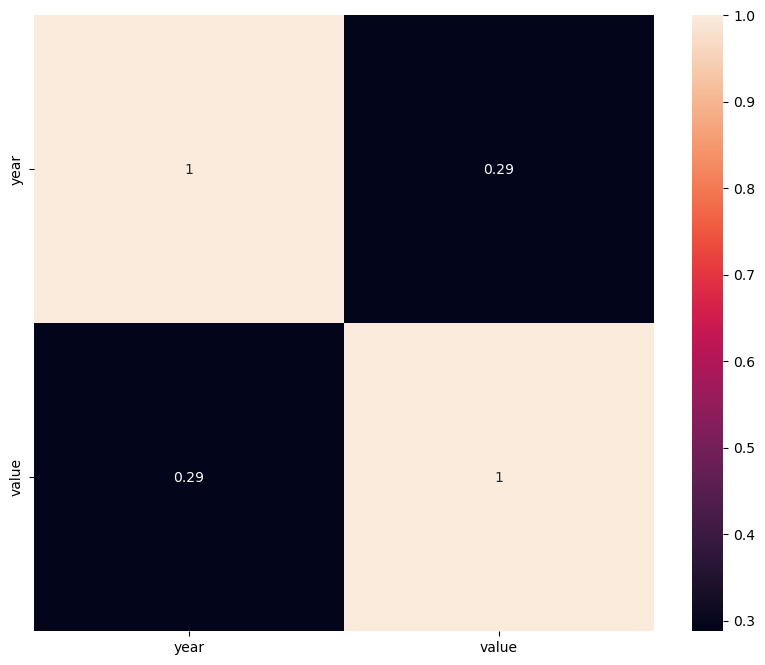

In [49]:
#Correlation Matrix and Heatmap 
corr_matrix = transport.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

## Model training and Model Validation

----------------------
### Need to X-y split and train-test-split BEFORE I apply transformations, 


In [50]:
transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    161 non-null    object 
 1   variable   161 non-null    object 
 2   year       161 non-null    int64  
 3   unit       161 non-null    object 
 4   powercode  161 non-null    object 
 5   flags      161 non-null    object 
 6   value      161 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 8.9+ KB


In [51]:
#Encoder data
country = transport.select_dtypes(object)[["country"]]

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first')
encoder.fit(country)

country_enc_np = encoder.transform(country).toarray()
country_enc    = pd.DataFrame(country_enc_np, columns=encoder.get_feature_names_out())
country_enc

,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Belgium,country_Bulgaria,country_Canada,country_Chile,country_China,country_Croatia,...,country_Romania,country_Russian Federation,country_Slovak Republic,country_Spain,country_Sweden,country_Switzerland,country_Türkiye,country_Ukraine,country_United Kingdom,country_United States
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
final_df = pd.concat([country_enc, transport[["value", "year"]]], axis=1)

In [53]:
final_df

,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Belgium,country_Bulgaria,country_Canada,country_Chile,country_China,country_Croatia,...,country_Slovak Republic,country_Spain,country_Sweden,country_Switzerland,country_Türkiye,country_Ukraine,country_United Kingdom,country_United States,value,year
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49901.000000,2006
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7794.000000,2011
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7220.910000,2015
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18203.000000,2007
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150998.000000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10005.000000,2017
157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13658.000000,2018
158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12442.000000,2019
159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9009.877284,2020


In [54]:
y = final_df['value']
x = final_df.drop('value', axis =1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [55]:
from sklearn.preprocessing import MinMaxScaler 

x_train_num = x_train.select_dtypes(include=np.number)
x_test_num = x_test.select_dtypes(include=np.number)

#Scaling data

transformer = MinMaxScaler().fit(x_train_num)

x_train_normalized = transformer.transform(x_train_num)
x_test_normalized = transformer.transform(x_test_num)

x_train_norm = pd.DataFrame(x_train_normalized, columns=x_train_num.columns)
x_test_norm  = pd.DataFrame(x_test_normalized, columns=x_test_num.columns)

In [56]:
x_train_norm

,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Belgium,country_Bulgaria,country_Canada,country_Chile,country_China,country_Croatia,...,country_Russian Federation,country_Slovak Republic,country_Spain,country_Sweden,country_Switzerland,country_Türkiye,country_Ukraine,country_United Kingdom,country_United States,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.190476
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.476190
124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.238095
125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.571429
126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.952381


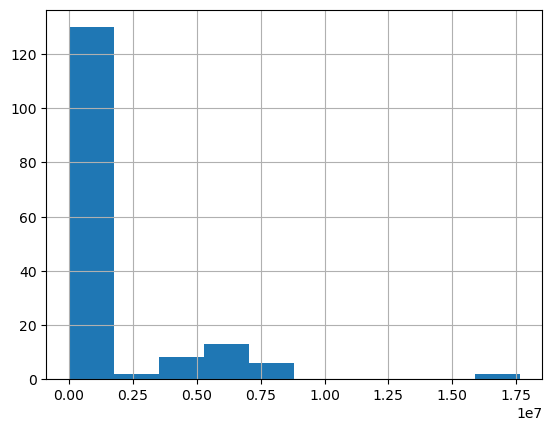

In [57]:
numerical['value'].hist();

In [58]:
numerical['value'].mean()

1389217.602704781

In [59]:
# Importing the required libraries 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

#Building the KNeighborsRegressor model
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(x_train_norm, y_train)

#Building the LinearRegression model
linear_regressor = LinearRegression()
linear_regressor.fit(x_train_norm, y_train)

#Making predictions on the traing set
linear_train_predictions = linear_regressor.predict(x_train_norm)


#Making predictions on the test test
linear_test_predictions = linear_regressor.predict(x_test_norm)

#Evaluation metrics 
from sklearn.metrics import mean_squared_error, r2_score

# Calculating the mean squared error on the training set 
linear_train_mse = mean_squared_error(y_train, linear_train_predictions)
print ('Linear Regression - training set mean squared error:', round(linear_train_mse,2))

# Calculating the mean squared error on the test set
linear_test_mse = mean_squared_error(y_test, linear_test_predictions)
print ('Linear Regression - Test set mean squredd error:', round(linear_test_mse,2))

#Calculating the mean squared the R2 score on the training set 
linear_train_r2 = r2_score(y_train, linear_train_predictions)
print('Linear Regression - Training set R2 score:', round(linear_train_r2,2))

#calculating the R2 score on the test set
linear_test_r2 = r2_score(y_test, linear_test_predictions)
print('Linear Regression - Test set R2 score:', round(linear_test_r2,2))


Linear Regression - training set mean squared error: 3381665024339.77
Linear Regression - Test set mean squredd error: 5218716800562.89
Linear Regression - Training set R2 score: 0.64
Linear Regression - Test set R2 score: -0.33
